# 과제1
비지도 학습의 목적인 Grouping에 대해 자세히 설명해 주세요! Dataset을 Grouping한다는 것이 무슨 의미인지 간단히 서술해 주시고,

세션에서 언급되었던 Grouping을 위한 두 수단에 대해서 예시 모델을 제시하여 설명해 주시면 됩니다! 예시 모델의 종류에 대해서는 구글링을 통해 조사할 수 있겠습니다.

---

비지도 학습에서의 Grouping은 데이터셋의 개별 관측치들을 유사한 특성을 가진 그룹으로 분류하는 것을 의미합니다. 이는 레이블이 없는 데이터에서 숨겨진 패턴이나 구조를 찾아내는 데 사용됩니다.

Grouping을 위한 두 가지 주요 수단은 군집화(Clustering)와 차원 축소(Dimensionality Reduction)입니다.

1. 클러스터링: 이는 데이터를 유사한 특성을 가진 여러 그룹으로 분류하는 방법입니다. 예를 들어, K-Means Clustering은 각 클러스터의 중심을 찾아 데이터 포인트를 가장 가까운 중심에 할당하는 방식으로 작동합니다.

2. 차원 축소: 이는 고차원 데이터에서 중요한 정보를 유지하면서 차원을 줄이는 방법입니다. 이를 통해 데이터를 더 쉽게 시각화하고 이해할 수 있습니다. 예를 들어, 주성분 분석(PCA)은 데이터의 분산을 최대화하는 새로운 특성을 찾아 고차원 데이터를 저차원으로 변환합니다.

# 과제2
드라이브에 첨부된 diabetes.csv 파일을 이용해, decision tree를 이용한 classifier model을 디자인해 주세요!

분류 문제에 맞는 (간단한 수준의) 데이터 전처리 및 Feature selection이 선행되어야 합니다.

모델의 성능은 상관 없지만, 모델 구동 결과 및 평가지표의 출력은 정상적으로 이루어져야 합니다! 평가지표의 종류 또한 상관 없습니다.

데이터셋에 대한 설명은 아래 캐클 링크를 참조해 주세요!
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

과제 진행에 있어 어려움을 겪으신다면 아래 링크의 내용을 참조하시면 됩니다!
https://www.datacamp.com/tutorial/decision-tree-classification-python


## 데이터 확인 및 전처리

In [48]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from matplotlib import pyplot as plt

In [54]:
pima = pd.read_csv("/Users/younyoung/Library/Mobile Documents/com~apple~CloudDocs/YBIGTA/2024-1 교육세션/0118 ML/실습 및 과제 데이터셋/diabetes.csv")
pima

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [52]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [40]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima["Outcome"] # Target variable

In [41]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [55]:
# y class별 비율
y_train.value_counts()/y_train.value_counts().sum()

Outcome
0    0.659218
1    0.340782
Name: count, dtype: float64

## Decision Tree 모델

In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [43]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


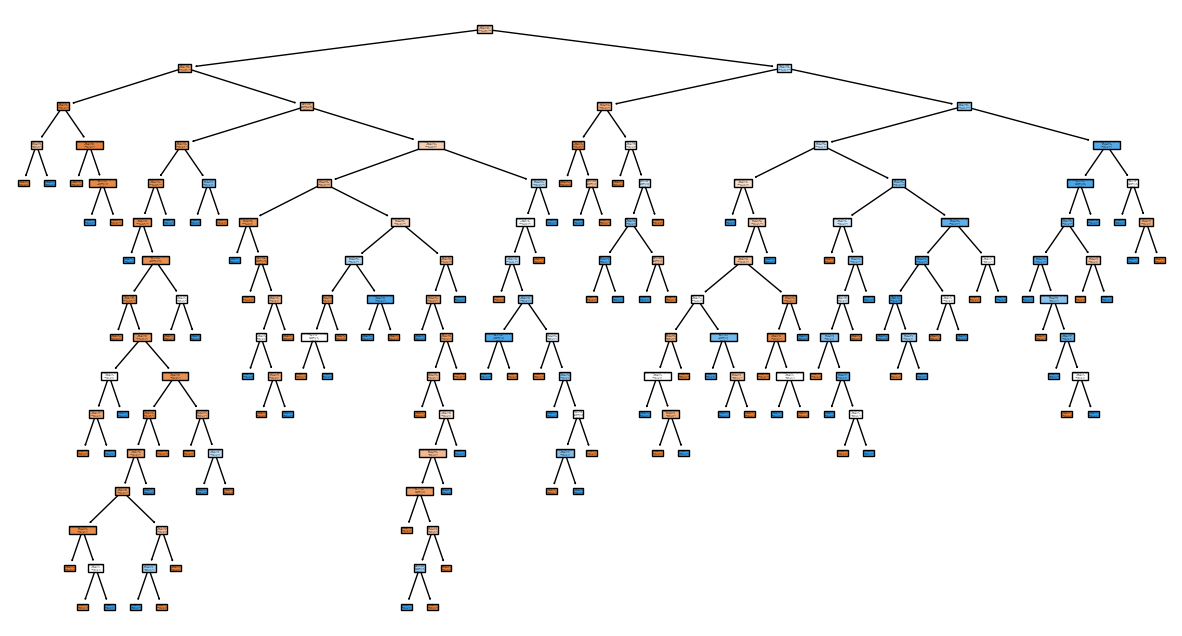

In [49]:
from sklearn import tree
fig=plt.figure(figsize=(15,8))
_=tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True)

### 모델 최적화

In [50]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


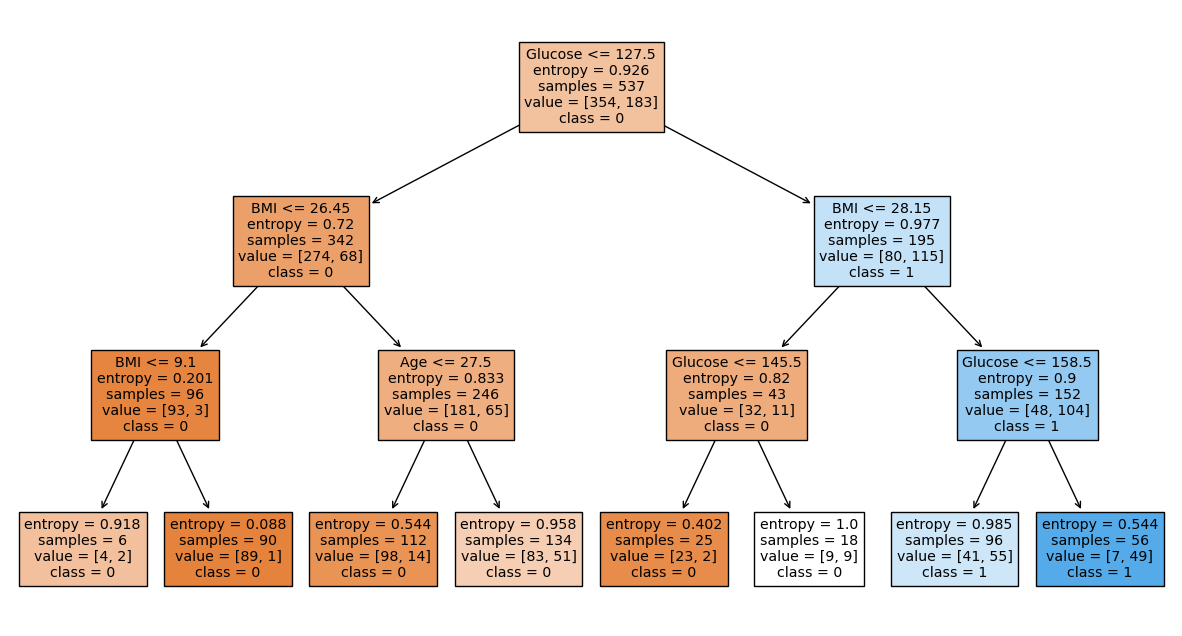

In [56]:
from sklearn import tree
fig=plt.figure(figsize=(15,8))
_=tree.plot_tree(clf, feature_names=feature_cols, class_names=['0','1'], filled=True)